**Conceptual steps of scRNA-seq data processing**

Step 1: Creating Mock scRNA-seq Data
We'll simulate a very small dataset of gene expression counts for a few cells and genes.

In [9]:
import pandas as pd
import numpy as np

# Simulate some gene expression data for 5 genes across 10 cells
np.random.seed(42)  # For reproducibility
genes = [f"Gene_{i}" for i in range(1, 6)]
cells = [f"Cell_{i}" for i in range(1, 11)]

# Generate random counts (integer values), representing gene expression levels
expression_data = np.random.poisson(lam=5, size=(5, 10))

# Create a DataFrame to hold the gene expression matrix
expr_matrix = pd.DataFrame(expression_data, index=genes, columns=cells)

expr_matrix.head()

,Cell_1,Cell_2,Cell_3,Cell_4,Cell_5,Cell_6,Cell_7,Cell_8,Cell_9,Cell_10
Gene_1,5,4,4,5,5,3,5,4,6,7
Gene_2,2,5,5,6,4,6,6,1,7,2
Gene_3,11,4,3,8,3,3,5,8,3,2
Gene_4,5,3,8,10,3,2,5,7,6,6
Gene_5,2,4,9,7,11,8,3,2,3,4


Step 2: Basic Quality Control
We'll simulate quality control by filtering out genes with low expression across cells.

In [10]:
# Filter out genes with low expression (sum of counts across all cells < 10)
filtered_expr_matrix = expr_matrix[expr_matrix.sum(axis=1) >= 10]

filtered_expr_matrix.head()


,Cell_1,Cell_2,Cell_3,Cell_4,Cell_5,Cell_6,Cell_7,Cell_8,Cell_9,Cell_10
Gene_1,5,4,4,5,5,3,5,4,6,7
Gene_2,2,5,5,6,4,6,6,1,7,2
Gene_3,11,4,3,8,3,3,5,8,3,2
Gene_4,5,3,8,10,3,2,5,7,6,6
Gene_5,2,4,9,7,11,8,3,2,3,4


Step 3: Normalization

For simplicity, we'll perform a basic normalization by dividing by the total counts per cell and then multiplying by a scaling factor (e.g., 10,000).

In [3]:
# Normalize expression data
norm_expr_matrix = filtered_expr_matrix.div(filtered_expr_matrix.sum(axis=0), axis=1) * 10000


Step 4: Identification of Highly Variable Genes
We'll select genes with the highest variance across cells as "highly variable genes".

In [4]:
# Compute variance and select top N variable genes
N = 3
variance = norm_expr_matrix.var(axis=1)
highly_variable_genes = variance.nlargest(N).index

# Filter matrix for highly variable genes
hvg_matrix = norm_expr_matrix.loc[highly_variable_genes]


Step 5: Dimensionality Reduction (Simplified)
We'll use PCA for dimensionality reduction, keeping it conceptual.

In [5]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(hvg_matrix.T)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=cells)


Step 6: Clustering (Simplified)
We'll perform a simple clustering (e.g., k-means) on the PCA-reduced data.

In [6]:
from sklearn.cluster import KMeans

# Perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Add clusters to the PCA DataFrame
pca_df['Cluster'] = clusters


Step 7: Visualization
Finally, we'll visualize the results of our PCA and clustering.

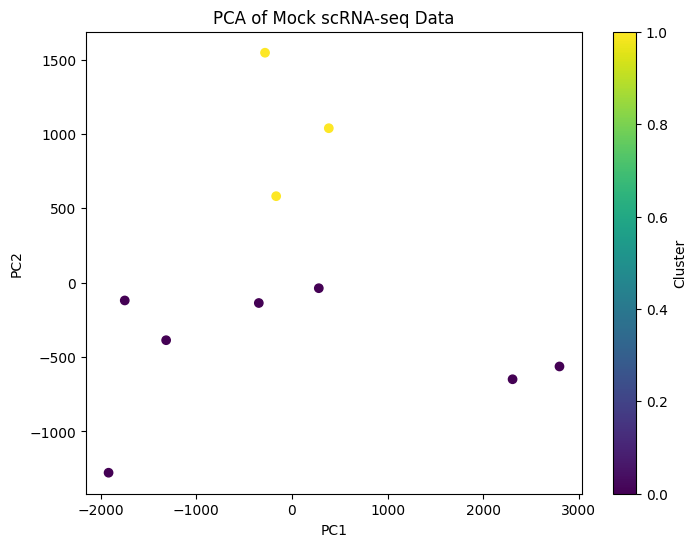

In [7]:
import matplotlib.pyplot as plt

# Plot PCA results with clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('PCA of Mock scRNA-seq Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster')
plt.show()
